## Домашнее задание 1

Основная цель домашнего задания:
- Отработать основные методы визуализации данных, рассмотренные в первом модуле.
- Научиться проводить качественный разведочный анализ данных (EDA), используя методы визуализации. Описать полученные результаты.
- Используя два метода, которые мы рассмотрели в первом модуле, закрепить принципы идентификации выбросов в данных.
- Разобрать способы использования визуализации при решении задачи регрессии.

**ВАЖНО.** Каждый график должен быть полностью оформлен (иметь заголовок, названия осей и т. д.)

## Задание 1. Знакомство с данными и EDA (4 балла)

В этом домашнем задании мы будем работать с данными по рынку [недвижимости в Нью-Йорке](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data). Перед тем как проводить анализ наших данных, необходимо провести разведочный анализ данных.

In [1]:
# Импортируем библиотеки и данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
ny_housing = ny_housing[ny_housing['PRICE'] <= 200000000]
ny_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
ny_housing.info()

<class 'pandas.DataFrame'>
Index: 4800 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4800 non-null   str    
 1   TYPE                         4800 non-null   str    
 2   PRICE                        4800 non-null   int64  
 3   BEDS                         4800 non-null   int64  
 4   BATH                         4800 non-null   float64
 5   PROPERTYSQFT                 4800 non-null   float64
 6   ADDRESS                      4800 non-null   str    
 7   STATE                        4800 non-null   str    
 8   MAIN_ADDRESS                 4800 non-null   str    
 9   ADMINISTRATIVE_AREA_LEVEL_2  4800 non-null   str    
 10  LOCALITY                     4800 non-null   str    
 11  SUBLOCALITY                  4800 non-null   str    
 12  STREET_NAME                  4800 non-null   str    
 13  LONG_NAME                    4800 

In [3]:
ny_housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,1.910039e+06,3.356042,2.373105,2182.579572,40.714268,-73.941542
std,4.929167e+06,2.602054,1.946461,2374.709381,0.087639,0.101011
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639512,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726756,-73.949182
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771924,-73.870638
max,1.950000e+08,50.000000,50.000000,65535.000000,40.912729,-73.702450


---

**Задание 1.1**

Создайте 6 визуализаций разных видов. Можно использовать графики из галерей [Matplotlib](https://matplotlib.org/stable/plot_types/index.html) или [Seaborn](https://seaborn.pydata.org/examples/index.html). Полученные графики отобразите и сохраните в отдельные переменные.

Каждый график должен иметь все стандартные аттрибуты: подписи осей, название и другие необходимые детали.

**NB** Визуализация должна иметь смысл и нести новую информацию.

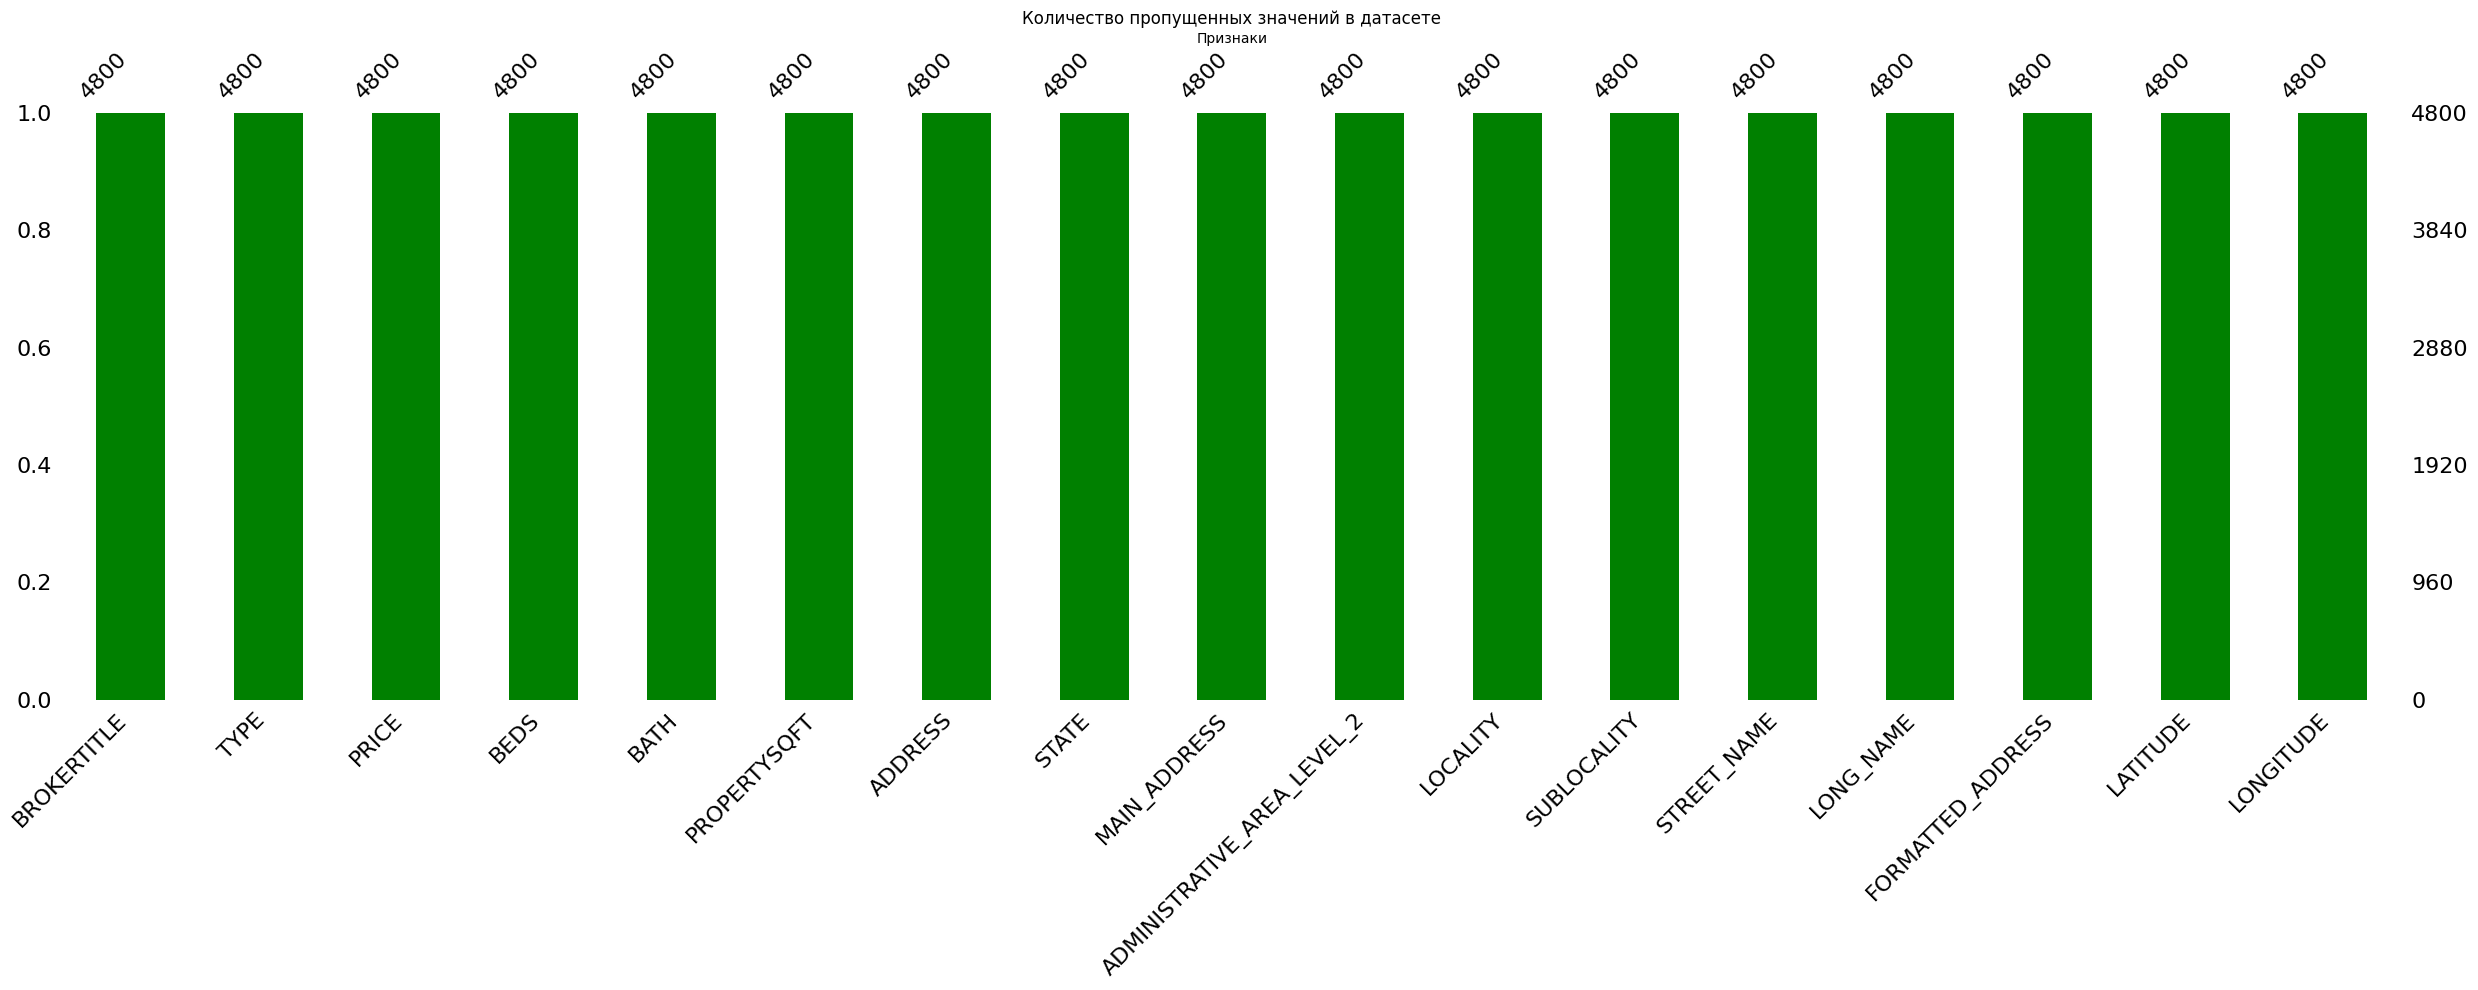

In [4]:
# Анализ пропущенных значений
plt.figure(figsize=(10, 6))
housing_nans = msno.bar(ny_housing, color='green')
plt.title("Количество пропущенных значений в датасете")
plt.xlabel("Признаки")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()



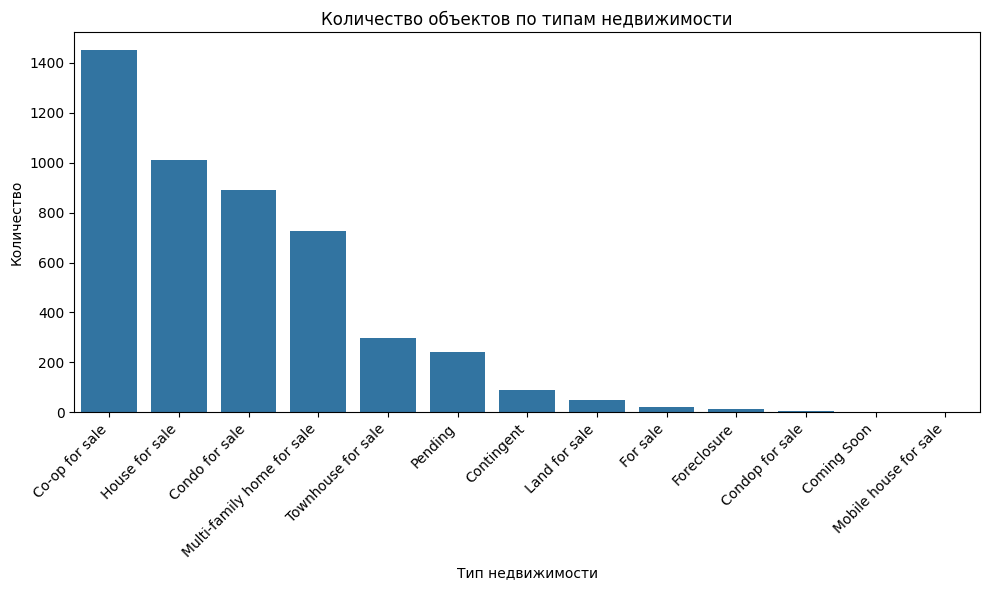

In [5]:
# Количество объектов по типам недвижимости
housing_type_counter = ny_housing["TYPE"].value_counts().reset_index()

plt.figure(figsize=(10, 6))
housing_type = sns.barplot(data=housing_type_counter, x="TYPE", y="count")
plt.title("Количество объектов по типам недвижимости")
plt.xlabel("Тип недвижимости")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()


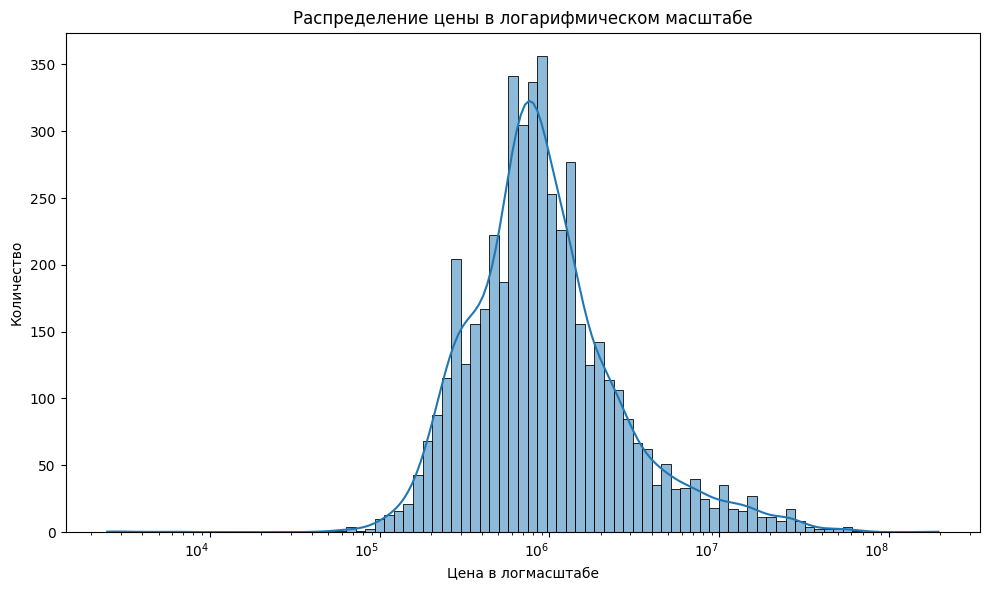

In [6]:
# Анализ ценового распределения
plt.figure(figsize=(10, 6))
price_distr = sns.histplot(data=ny_housing["PRICE"], log_scale=True, kde=True)
plt.title("Распределение цены в логарифмическом масштабе")
plt.xlabel("Цена в логмасштабе")
plt.ylabel("Количество")
plt.xticks(ha="right") 
plt.tight_layout()
plt.show()

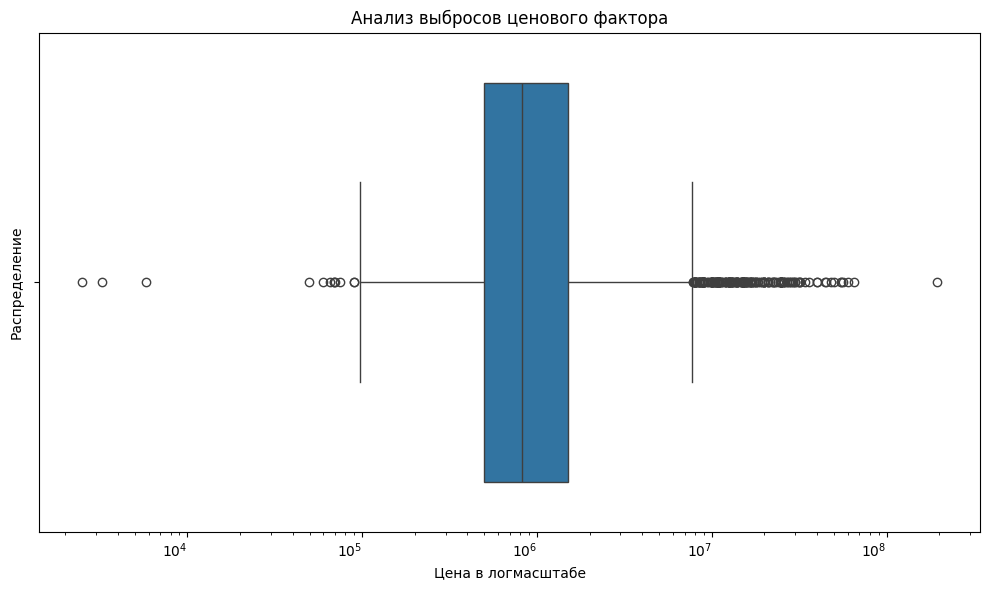

In [7]:
# Визуализация боксплот - анализ выбросов
plt.figure(figsize=(10, 6))
price_outliers = sns.boxplot(data=ny_housing["PRICE"], log_scale=True, orient="h")
plt.title("Анализ выбросов ценового фактора")
plt.xlabel("Цена в логмасштабе")
plt.ylabel("Распределение")
plt.xticks(ha="right") 
plt.tight_layout()
plt.show()

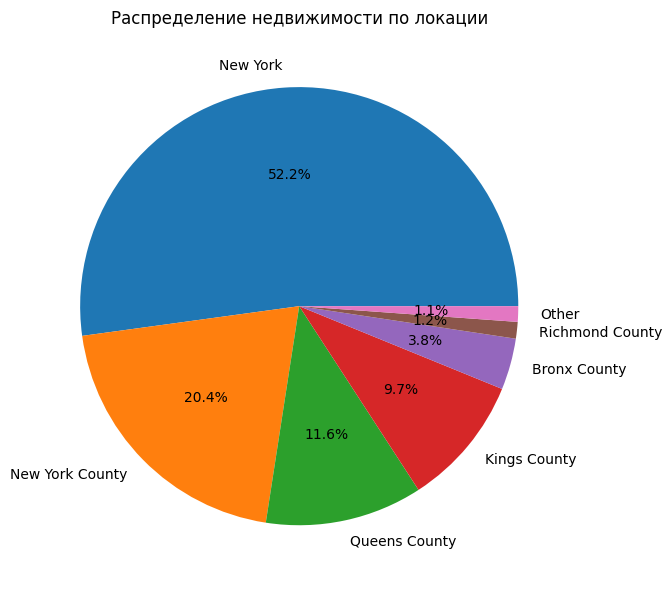

In [8]:
# Круговая диаграмма
# Пороговая доля
threshold = 0.01
all_freq = ny_housing["LOCALITY"].value_counts(normalize=True)

# Отбираем категории выше порога
main_cats = all_freq[all_freq > threshold]

# Суммируем доли категорий ниже порога (или равных порогу)
other_sum = all_freq[all_freq <= threshold].sum()
if other_sum > 0:
    main_cats["Other"] = other_sum

labels = main_cats.reset_index()["LOCALITY"].to_list()
plt.figure(figsize=(10, 6))
pie_location = plt.pie(main_cats, labels=labels, autopct='%1.1f%%')
plt.title("Распределение недвижимости по локации")
plt.tight_layout()
plt.show()

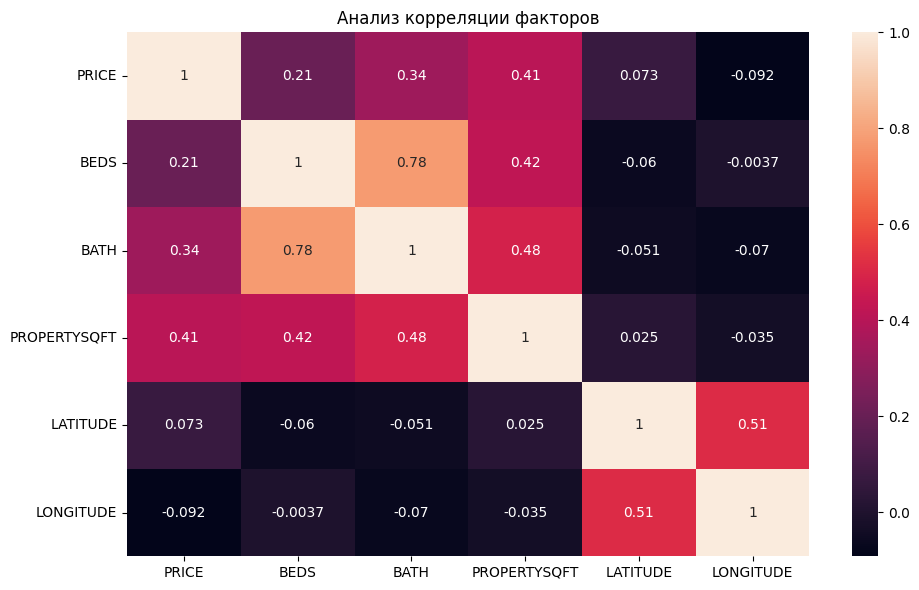

In [9]:
# Визуализация тепловой карты корреляции числовых фичей

plt.figure(figsize=(10, 6))
numeric_cols = ny_housing.select_dtypes(include='number').columns.tolist()
ny_corr_data = ny_housing[numeric_cols].corr()
corr_plot = sns.heatmap(ny_corr_data, annot=True)

plt.title("Анализ корреляции факторов")

plt.tight_layout()
plt.show()

**Задание 1.2**

В рамках модуля мы научились использовать функцию [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) для создания «полотна» с целью отображения нескольких графиков на одном поле.
Создайте полотно размером 3x2 (три строки и два столбца). На этом полотне изобразите все графики, которые ранее были созданы в задании 1.1.

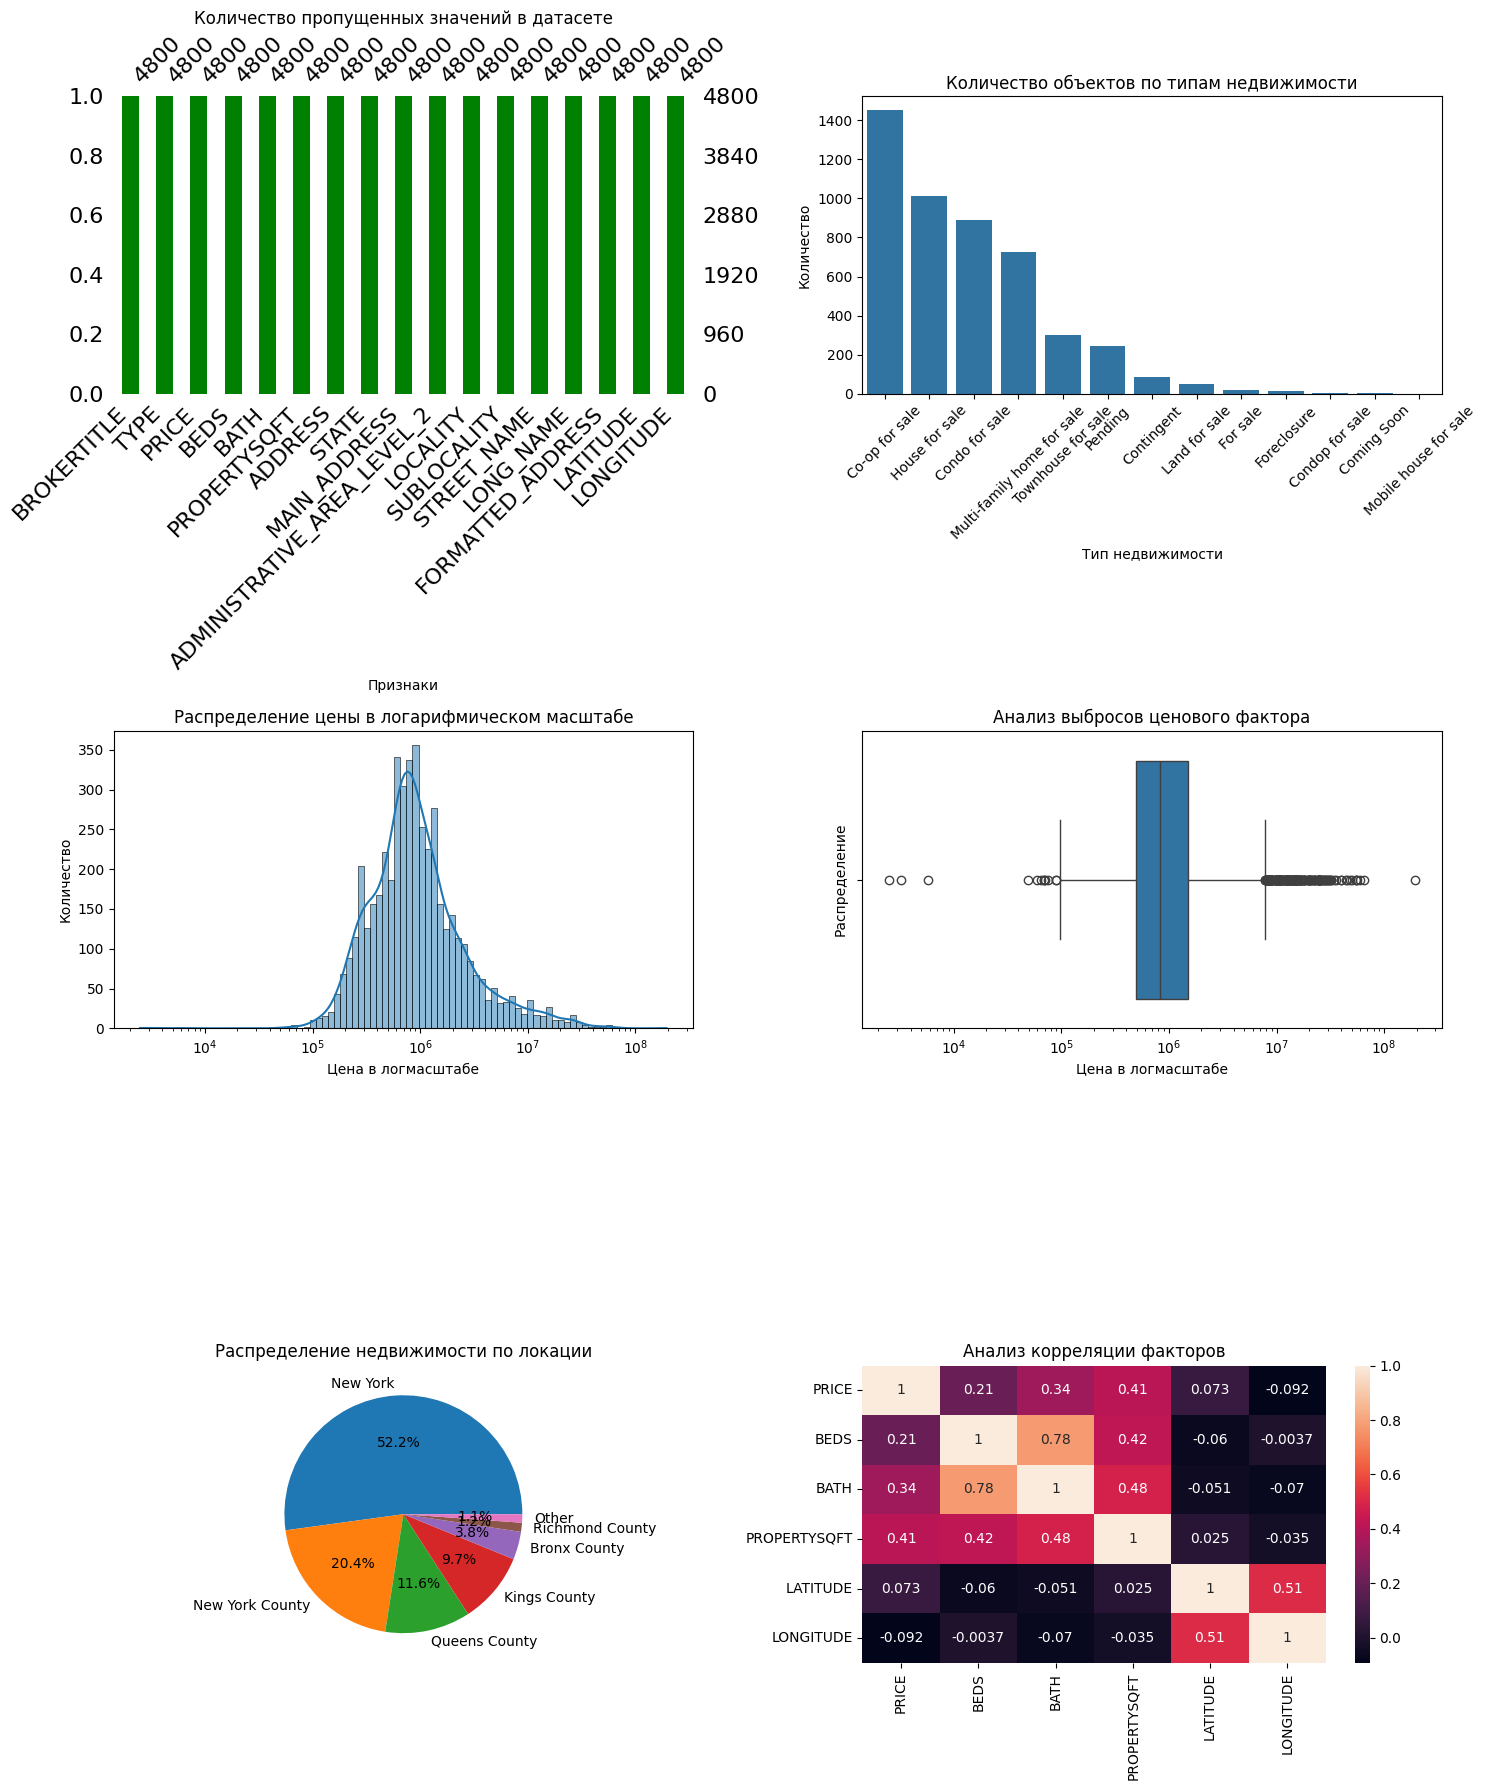

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. График пропущенных значений (missingno)
msno.bar(ny_housing, ax=axes[0, 0], color='green')
axes[0, 0].set_title("Количество пропущенных значений в датасете")
axes[0, 0].set_xlabel("Признаки")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Количество объектов по типам недвижимости
sns.barplot(data=housing_type_counter, x="TYPE", y="count", ax=axes[0, 1])
axes[0, 1].set_title("Количество объектов по типам недвижимости")
axes[0, 1].set_xlabel("Тип недвижимости")
axes[0, 1].set_ylabel("Количество")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Распределение цены
sns.histplot(data=ny_housing["PRICE"], log_scale=True, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Распределение цены в логарифмическом масштабе")
axes[1, 0].set_xlabel("Цена в логмасштабе")
axes[1, 0].set_ylabel("Количество")

# 4. Боксплот цены
sns.boxplot(data=ny_housing["PRICE"], log_scale=True, orient="h", ax=axes[1, 1])
axes[1, 1].set_title("Анализ выбросов ценового фактора")
axes[1, 1].set_xlabel("Цена в логмасштабе")
axes[1, 1].set_ylabel("Распределение")

# 5. Круговая диаграмма по локациям
wedges, texts, autotexts = axes[2, 0].pie(main_cats, labels=main_cats.index, autopct='%1.1f%%')
axes[2, 0].set_title("Распределение недвижимости по локации")

# 6. Тепловая карта корреляции
sns.heatmap(ny_corr_data, annot=True, ax=axes[2, 1])
axes[2, 1].set_title("Анализ корреляции факторов")

plt.tight_layout()
plt.show()

**Задание 1.3**

Интерпретируйте полученные результаты. К каждому графику напишите описание — какую полезную информацию мы получили в результате использования этой визуализации. Постарайтесь сделать это максимально подробно и полно.

1. График пропущенных значений на основе библиотеки missingno позволяет нам видель отсутсвие пропущенных значений по какому-либо столбцу на загруженной подвыборке датасета.

2. График "Количество объектов по типам недвижимости" позволяет нам оценить распределение по типам объектов и выявить как модальную категорию "Co-op for sale" так и примерно оценить, на основе частотного анализа, вероятные кластеры-категории в которые можно закодировать данный фит, имеющий изначально качественный характер, иными словами мы можем осуществить категориальное кодирование на основе частот, а не прибегать к разряжению матрицы через ohe.

3. График "Распределение цены" в лог масштабе с приближающимся ядром плотности к нормальному распределению, говорит нам о том, что распределение имеет тяжелый правый хвост и, вероятно, аномальные (возможно выбросы в контексте выбираемой задачи) значения, которые следует зачищать (в случан задачи предсказания цены).

4. График "Боксплот цены", в контексте ранее рассмотренного графика распределения цены и в логарифмическом масштабе - посзволяет оценить вероятные аномальные значения за пределами 1.5 iqr, сохранив визуальную репрезентативность, но стоит отметить, что, как было сказано ранее, распределение ассиметрично с тяжелым хвостом, так что вероятнее всего, точки от левого уса не являются выбросами (в отличие от точек справа, помним про тяжелый ПРАВЫЙ хвост), а скорее являются аномально низкими, но приемлимыми и характерными значениями для определнной категории недвижимости.

5. График "Круговая диаграмма по локациям" позволяет оценить в долях основные районы фигурирующие в датасете, можно видеть что датасет в основном оперирует районами города Нью-Йорк (что довольно очевидно из названия датасета), хотя в неагригированную диаграмму (на этапе построения более визуально репрезентативной) попадали объекты и за пределами характерного для датасета региона, что наталкивает на мысль очистить от них первичный датасет (если задача того требует в части чистоты к районированию).

6. График "Тепловая карта корреляции" позволяет оценить наличие мультиколлинеарности признаков (в данном случае не наблюдается, за исключением относительно сильной в контексте датасета связи между широтой и долготой-что логично), а так же например оценить влияние факторов на таргет (например на цену), в целом хитмап говорит нам о достаточной чистоте данных.

> Вывод: 
- Отсутствие пропущенных значений
- Стандартная ситуация по логнормальному распределению для цены (цену лучше сразу логарифмировать для оптимизации, с учетом того что отрицательных значений нет, то можно не извращаться с бокскоксом а просто логарифировать и брать экспоненту для обратного масштабирования)
- Можно для первичного анализа посмотреть медианную и среднюю цену, но если мы планируем моделировать регрессию, то кажется пустым занятием, так что просто вывел основные статистики где видны наличия атипичных значенией как по цене так и по конфигурации (в экстримальных точках), что может говорить об аномалиях (ошибках).
- Вероятное наличие выбросов в правом хвосте распределения
- Вероятно нерелевантные данные не принадлежащие маржинальному региону датасета, возможно есть смысл убрать все что не касается региона Нью-Йорк
- Отсутсвие мультиколлинеарности и достаточная существенность влияние на таргет (если по классике смотрим в сторону регрессии)
- Наличие "кластеров" типов недвижимости по частотной представленности

**Задание 1.4**

В наших данных есть столбец `TYPE`, отвечающий за тип проданной недвижимости (квартира, дом, таунхаус и т. д.).

Создайте `barplot`, на котором будет показана средняя стоимость недвижимости разных типов в New York County (столбец `SUBLOCALITY`).

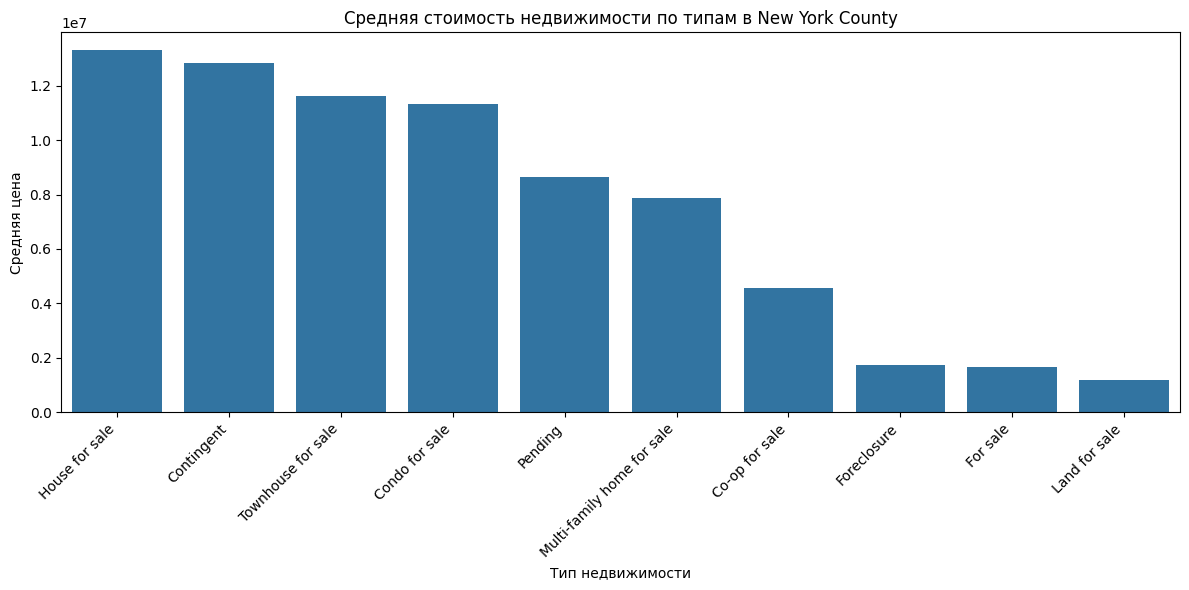

In [11]:
ny_county_data = ny_housing[ny_housing['SUBLOCALITY'] == 'New York County']
avg_price_by_type = ny_county_data.groupby('TYPE')['PRICE'].mean().reset_index()

avg_price_by_type = avg_price_by_type.sort_values('PRICE', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_price_by_type,
    x='TYPE',
    y='PRICE',
    order=avg_price_by_type['TYPE']
)
plt.title('Средняя стоимость недвижимости по типам в New York County')
plt.xlabel('Тип недвижимости')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Задание 1.5**

**Какой тип квартир самый популярный в разных районах?**

В столбце `SUBLOCALITY` указан район расположения объектов недвижимости. Всего в этом столбце 21 разных районов. Однако некоторые из них содержат слишком маленькое количество наблюдений.

- Оставьте только те районы (столбец `SUBLOCALITY`), количество наблюдений в которых больше или равно 100.
- Для оставшихся районов сделайте `barplot`, в котором для каждого района будет указана доля квартир разных видов (столбец `TYPE`).
- Полученные значения отсортируйте по убыванию по доле квартир (`Condo for sale`).

**Подсказка**: аналогичный алгоритм мы рассматривали на лекции в ходе вычисления доли женщин, берущих кредит.

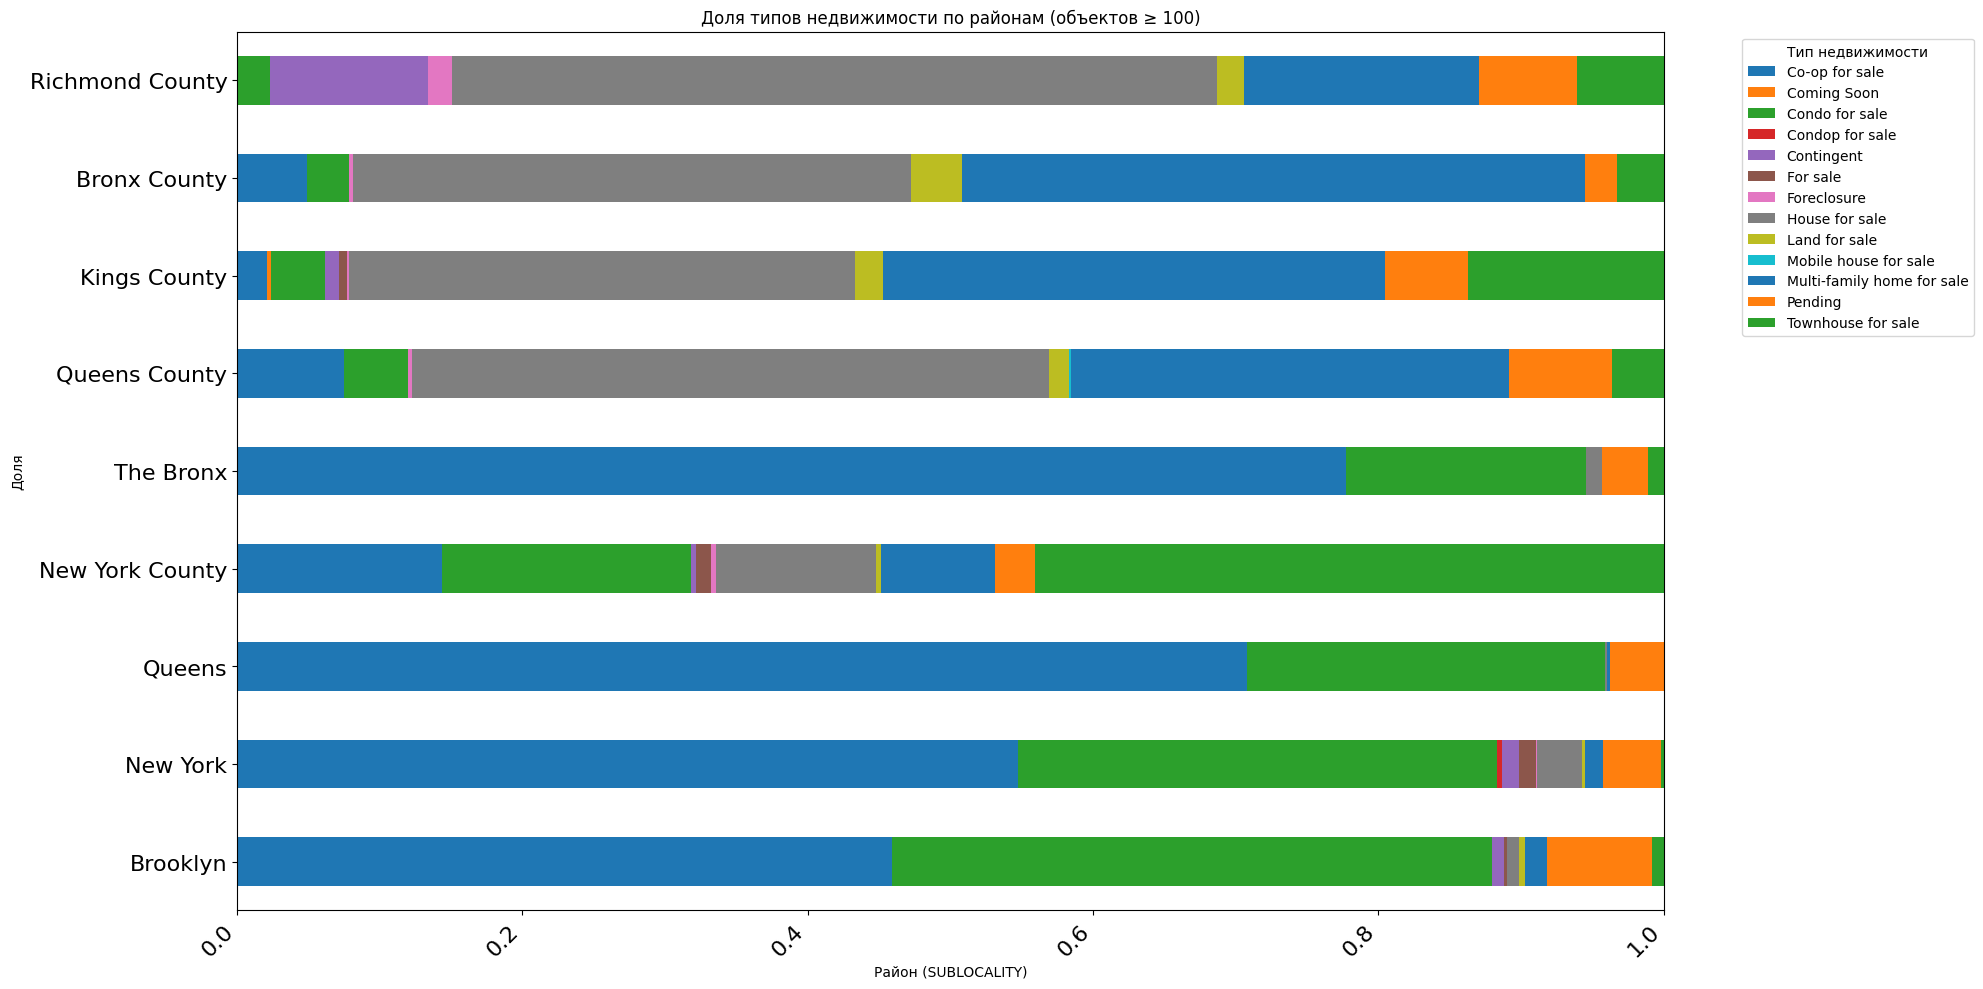

In [12]:
freq_location = 100
subloc_counts = ny_housing['SUBLOCALITY'].value_counts()
valid_sublocs = subloc_counts[subloc_counts >= freq_location].index

# Отфильтрованный датафрейм
df_filtered = ny_housing[ny_housing['SUBLOCALITY'].isin(valid_sublocs)]

# Таблица частот
freq = pd.crosstab(df_filtered['SUBLOCALITY'], df_filtered['TYPE'])

# Перевод в доли
proportions = freq.div(freq.sum(axis=1), axis=0)

# Сортировка по убыванию доли
proportions_sorted = proportions.sort_values('Condo for sale', ascending=False)

# Построение barplot
plot = proportions_sorted.plot.barh(
    figsize=(20, 10), fontsize=16, stacked=True, title='Доля типов недвижимости по районам (объектов ≥ 100)')
plt.title('Доля типов недвижимости по районам (объектов ≥ 100)')
plt.xlabel('Район (SUBLOCALITY)')
plt.ylabel('Доля')
plt.legend(title='Тип недвижимости',
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Отлично! Теперь мы ориентируемся в данных, понимаем их структуру и особенности. Можно переходить к очистке от выбросов перед созданием модели.

---

## Задание 2. Работа с выбросами (3 балла)

**Задание 2.1**

В нашем датасете есть два признака, в которых могут находиться выбросы — `PRICE` и `PROPERTYSQFT` (подумайте, почему их не может быть в других числовых переменных).

Используя `boxplot`, идентифицируйте выбросы в обеих переменных в зависимости от типа недвижимости (`TYPE`).

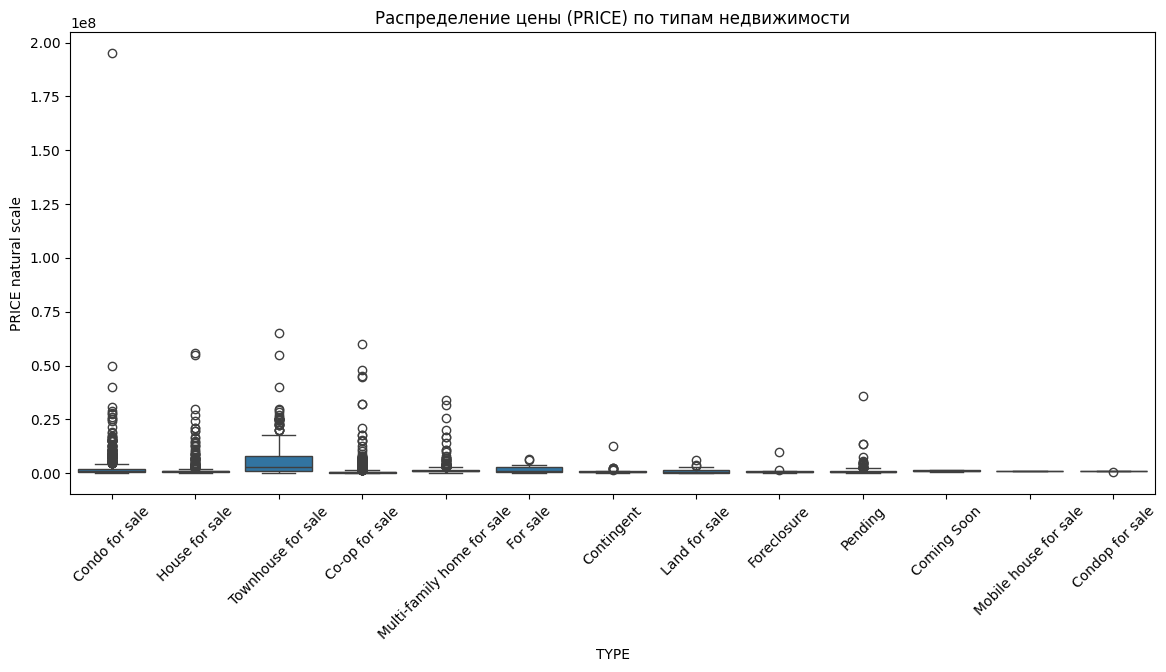

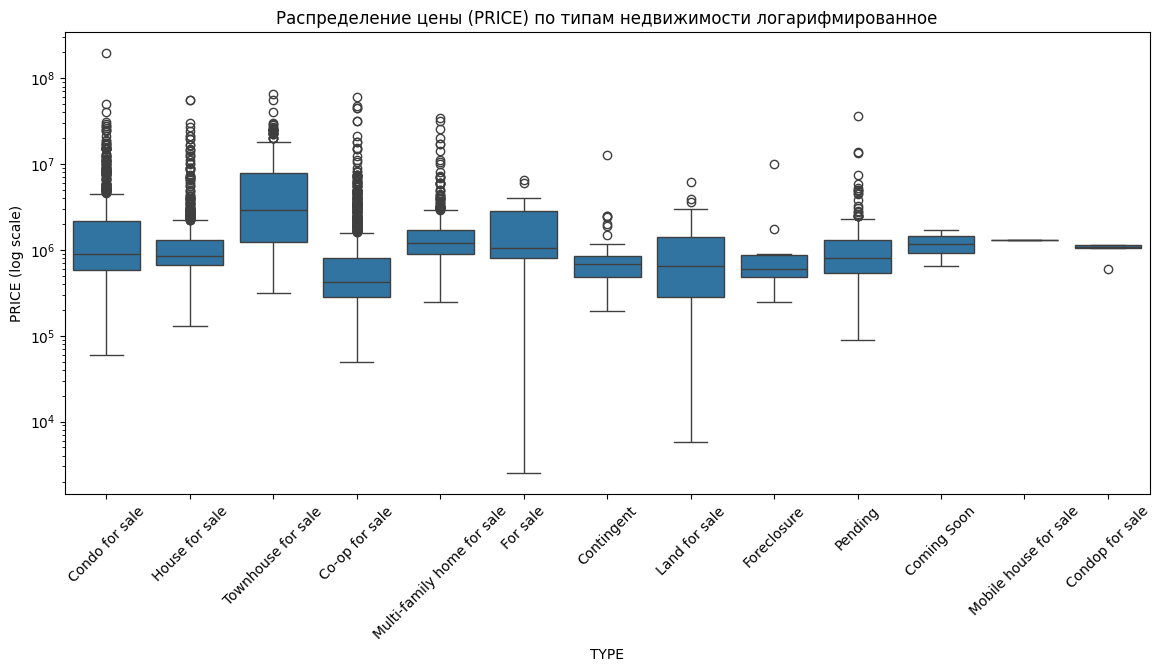

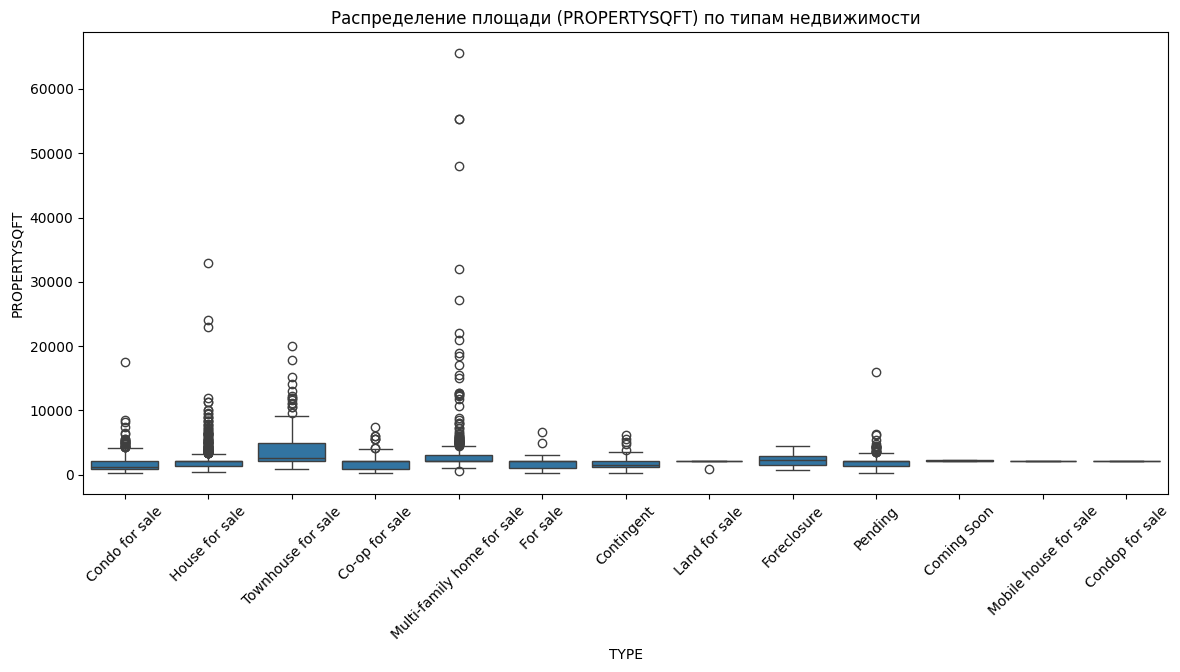

In [13]:
# График для PRICE
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PRICE', data=ny_housing)
plt.title('Распределение цены (PRICE) по типам недвижимости')
plt.ylabel('PRICE natural scale')
plt.xticks(rotation=45)
plt.show()

# График для PRICE logscale
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PRICE', data=ny_housing)
plt.yscale('log') # логарифмическая шкала, исходя из характера распределения фита
plt.title('Распределение цены (PRICE) по типам недвижимости логарифмированное')
plt.ylabel('PRICE (log scale)')
plt.xticks(rotation=45)
plt.show()

# График для PROPERTYSQFT
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PROPERTYSQFT', data=ny_housing)
# plt.yscale('log')
plt.title('Распределение площади (PROPERTYSQFT) по типам недвижимости')
plt.ylabel('PROPERTYSQFT')
plt.xticks(rotation=45)
plt.show()


In [14]:
print("Проверка нулевых и отрицательных цен")
display(ny_housing.query("PRICE <= 0"))

print("Проверка нулевых и отрицательных площадей")
display(ny_housing.query("PROPERTYSQFT <= 0"))

Проверка нулевых и отрицательных цен


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


Проверка нулевых и отрицательных площадей


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


> Для цены был выбран подход анаилза логарифмированного ряда в контексте анализа аномальных значений, при этом можно отметить, что в разрезе типов нелвидимости аномалий в левых хвостах почти не наблюдается, кроме типа "Condop for sale" - 1 значение, так же проверка на нулевую или отрицательную цену не выявили наличие записей, что говорит о концентрации выбросов именно в правом хвосте логнормального (по маржинальному распределению цены) распределения.

> Анализ квадратуры так же не выявил нулевых или отрицательных значений, так же как и с ценой выбросы находятся в правых хвостах в разрезе типов.

> Исходя из того что оба фита имееют аномалии в правх хвостах по типам, значения которых атипичны для рассматриваемых групп (интеконтекстуальное сравнение), но при этом не всегда являются аномальными для маргинального распределения фита, видится разумным полная зачистка по усам, что в теории даст более стабильный и чистый результат на обобщение, как в задачах классификации так и в задачах регрессии.

**Задание 2.2**

Удалите выбросы в датасете по переменной `PRICE`, которые были обнаружены в задании 2.1.
После удаления выведите `bar plot`, который будет визуализировать среднюю стоимость недвижимости в зависимости от типа недвижимости.

In [15]:
# Напишем функцию очистки от выбросов
def outliers_finder(data: pd.DataFrame, column_name: str, group_col: str = None, threshold: int = 1.5, log_scale: bool = False):
    """_summary_

    Args:
        data (pd.DataFrame): входные данные по фиту
        threshold - пороговое значение коэф-та для тюновой очистки
        log_scale : bool, default=False Если True, границы выбросов определяются на логарифмированных значениях,
        но возвращаются исходные данные (без выбросов).
        group_col : str, optional. Имя столбца для группировки (например, 'TYPE'). Если указан,
        выбросы определяются отдельно для каждой группы.

    Return:
        cleaned - очищенный датасет (копия)
        outliers - выбросы (субсет)
    """
    df = data.copy()

    # Временный столбец для вычислений
    if log_scale:
        if (df[column_name] <= 0).any():
            raise ValueError("Логарифмирование требует положительных значений.")
        temp = np.log(df[column_name])
    else:
        temp = df[column_name]

    # Если смотрим в разрезе групп
    if group_col is not None:
        # Создаем маски
        mask_clean = pd.Series(False, index=df.index)
        mask_out = pd.Series(False, index=df.index)

        # Для каждой группы вычисляем свои границы
        for _, group_data in df.groupby(group_col):
            group_temp = temp.loc[group_data.index]

            q1 = group_temp.quantile(0.25)
            q3 = group_temp.quantile(0.75)
            iqr = q3 - q1

            lower = q1 - threshold * iqr
            upper = q3 + threshold * iqr

            # Маска для данной группы
            inlier = (group_temp >= lower) & (group_temp <= upper)
            outlier = (group_temp < lower) | (group_temp > upper)

            # Заполняем общие маски
            mask_clean.loc[group_data.index] = inlier
            mask_out.loc[group_data.index] = outlier
    else:
        # Без группировки 
        q1 = temp.quantile(0.25)
        q3 = temp.quantile(0.75)
        iqr = q3 - q1

        lower = q1 - threshold * iqr
        upper = q3 + threshold * iqr

        mask_clean = (temp >= lower) & (temp <= upper)
        mask_out = (temp < lower) | (temp > upper)

    cleaned = df.loc[mask_clean].copy()
    outliers = df.loc[mask_out].copy()

    return cleaned, outliers

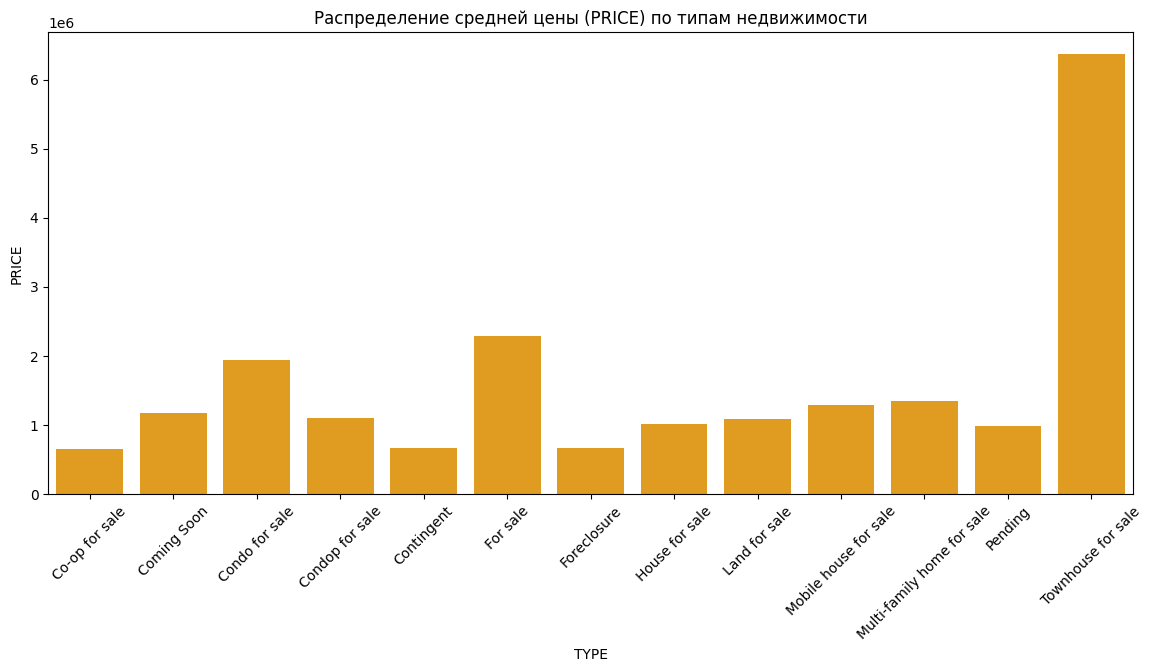

In [16]:
ny_housing_price = ny_housing.copy()
ny_cleaned, price_outliers = outliers_finder(data=ny_housing_price, column_name="PRICE", group_col="TYPE", log_scale=True)

price_by_type = ny_cleaned.groupby("TYPE")["PRICE"].mean()

# График для PRICE
plt.figure(figsize=(14, 6))
sns.barplot(x=price_by_type.index, y=price_by_type.values, color="orange")
plt.title('Распределение средней цены (PRICE) по типам недвижимости')
plt.ylabel('PRICE')
plt.xticks(rotation=45)
plt.show()

**Задание 2.3**

С помощью правила трех сигм найдите, какие значения являются экстремальными (выбросами) в столбце `PROPERTYSQFT`. Результат выведите в текстовом виде и сравнить с результатом, полученным с помощью `box plot` в задании 2.1.

In [17]:
# На всякий случай работаем с копией исходных данных
ny_housing_sqft = ny_housing.copy()
# Функция для поиска выбросов по правилу треъ сигм с группировкой
def three_sigma_outliers(data, value_col, group_col):
    """
    Возвращает маску: True для строк, где value_col является выбросом
    по правилу трех сигм внутри своей группы.
    """
    mask = pd.Series(False, index=data.index)
    for _, group_df in data.groupby(group_col):
        values = group_df[value_col]
        mean = values.mean()
        std = values.std()
        lower = mean - 3 * std
        upper = mean + 3 * std
        group_mask = (values < lower) | (values > upper)
        mask.loc[group_df.index] = group_mask
    return mask


# Применяем к данным (не очищенным по цене для определения выбросов именно по метражу)
ny_housing_sqft['outlier_3sigma'] = three_sigma_outliers(
    ny_housing_sqft, 'PROPERTYSQFT', 'TYPE')

# Количество выбросов по 3-сигма в разрезе типов
count_3sigma = ny_housing_sqft.groupby('TYPE')['outlier_3sigma'].sum().astype(int)

# Находим выбросы по методу IQR с помощью функции c этапа определения на цене
cleaned_iqr, outliers_iqr = outliers_finder(
    data=ny_housing_sqft,
    column_name='PROPERTYSQFT',
    group_col='TYPE',
    threshold=1.5,
    log_scale=False # не встречал что площади логарифмируют
)

# Создаем маску для выбросов IQR
ny_housing_sqft['outlier_iqr'] = False
ny_housing_sqft.loc[outliers_iqr.index, 'outlier_iqr'] = True

# Количество выбросов по боксплоту (IQR)
count_iqr = ny_housing_sqft.groupby('TYPE')['outlier_iqr'].sum().astype(int)


# Сравнительная таблица
comparison = pd.DataFrame({
    'Тип недвижимости': count_3sigma.index,
    '3-сигма': count_3sigma.values,
    'IQR (boxplot)': count_iqr.values,
    'Всего записей': ny_housing_sqft.groupby('TYPE').size().values
})
comparison['Разница (IQR - 3sigma)'] = comparison['IQR (boxplot)'] - \
    comparison['3-сигма']
print("\nСравнение методов обнаружения выбросов:")
display(comparison)


Сравнение методов обнаружения выбросов:


,Тип недвижимости,3-сигма,IQR (boxplot),Всего записей,Разница (IQR - 3sigma)
0,Co-op for sale,9,8,1450,-1
1,Coming Soon,0,0,2,0
2,Condo for sale,14,26,891,12
3,Condop for sale,0,0,5,0
4,Contingent,3,5,88,2
5,For sale,1,2,20,1
6,Foreclosure,0,0,14,0
7,House for sale,16,94,1011,78
8,Land for sale,1,1,49,0
9,Mobile house for sale,0,0,1,0


> Правило трех сигм опирается на среднее и стандартное отклонение, которые сами чувствительны к наличию экстремальных значений. Из-за этого границы могут растягиваться под влиянием выбросов, и часть аномальных точек оказывается внутри интервала. 

> Метод IQR использует медиану и квартили, устойчивые к выбросам. Границы Q1 - 1.5*IQR и Q3 + 1.5*IQR лучше отделяют хвосты распределения, что приводит к выявлению большего числа потенциальных выбросов.

> Метод IQR (boxplot) является более предпочтительным для обнаружения выбросов в реальных данных, особенно при наличии асимметрии и тяжелых хвостов распределения. Задание 2.3 наглядно демонстрирует это различие.

> Правило трех сигм можно применять, если распределение близко к нормальному, но для цен и площадей недвижимости это допущение у нас нарушается.

**Задание 2.4**

Мы нашли значение, после которого все наши наблюдения можно назвать выбросами.

Создайте `scatter plot` (столбцы `PROPERTYSQFT` и `PRICE`), в котором все точки выше этого значения `PROPERTYSQFT` будут помечены красным цветом. Таким образом мы подсветим наши выбросы.

После этого удалите эти значения из датасета (сортировка по переменной `PROPERTYSQFT`).

Верхняя граница (глобальный IQR): 3660.52


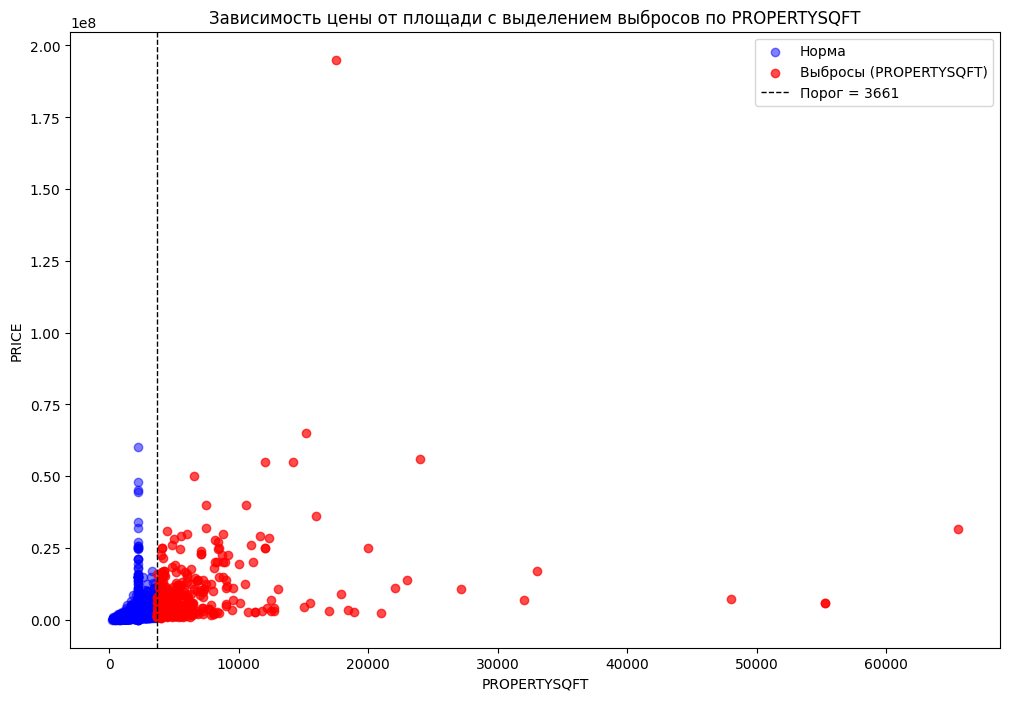

In [18]:
# Визуализация
# Исходные данные и расчет квантилей для PROPERTYSQFT
q1 = ny_housing['PROPERTYSQFT'].quantile(0.25)
q3 = ny_housing['PROPERTYSQFT'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"Верхняя граница (глобальный IQR): {upper_bound:.2f}")

# Построение scatter plot с подсветкой выбросов
outlier_mask = ny_housing['PROPERTYSQFT'] > upper_bound

plt.figure(figsize=(12, 8))
# Нормальные точки
plt.scatter(ny_housing.loc[~outlier_mask, 'PROPERTYSQFT'],
            ny_housing.loc[~outlier_mask, 'PRICE'],
            c='blue', alpha=0.5, label='Норма')
# Выбросы
plt.scatter(ny_housing.loc[outlier_mask, 'PROPERTYSQFT'],
            ny_housing.loc[outlier_mask, 'PRICE'],
            c='red', alpha=0.7, label='Выбросы (PROPERTYSQFT)')
plt.axvline(x=upper_bound, color='black', linestyle='--', linewidth=1, label=f'Порог = {upper_bound:.0f}')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.title('Зависимость цены от площади с выделением выбросов по PROPERTYSQFT')
plt.legend()
plt.show()

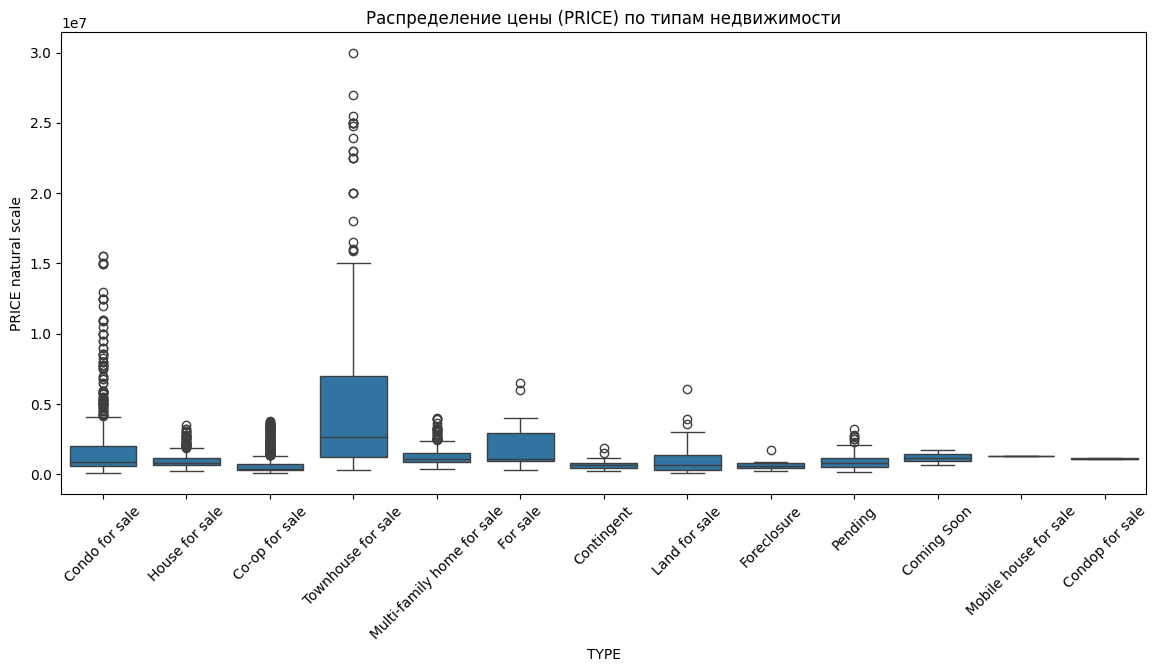

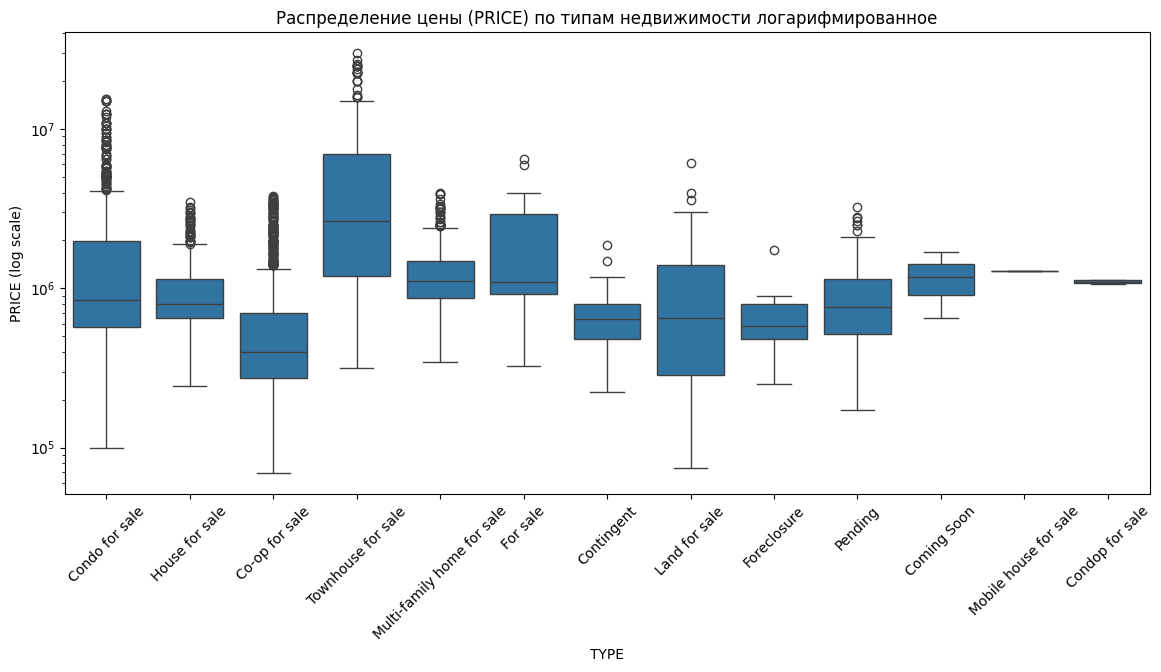

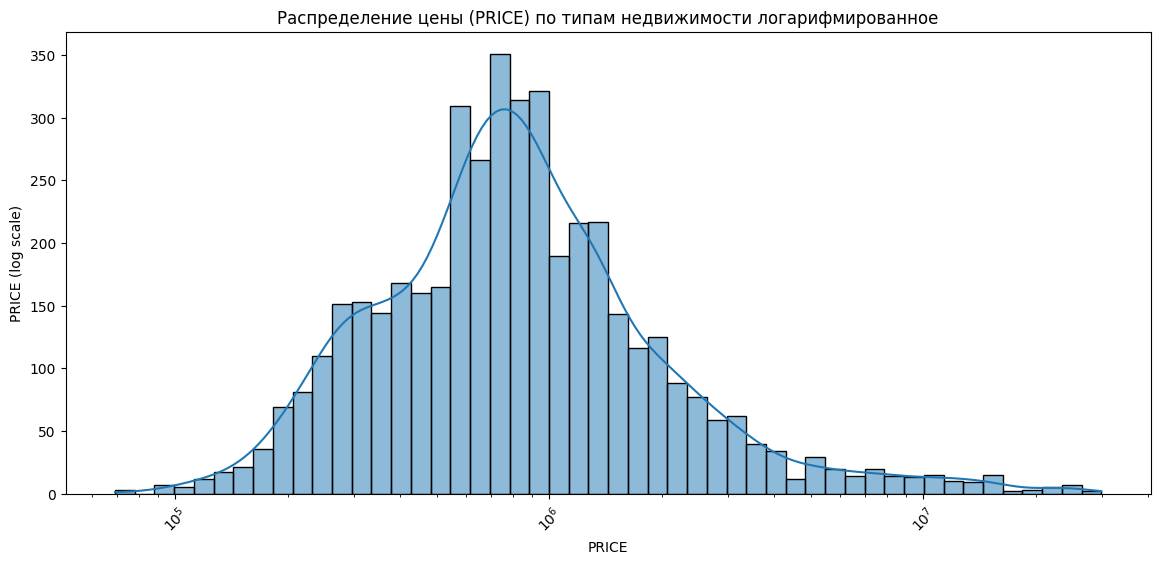

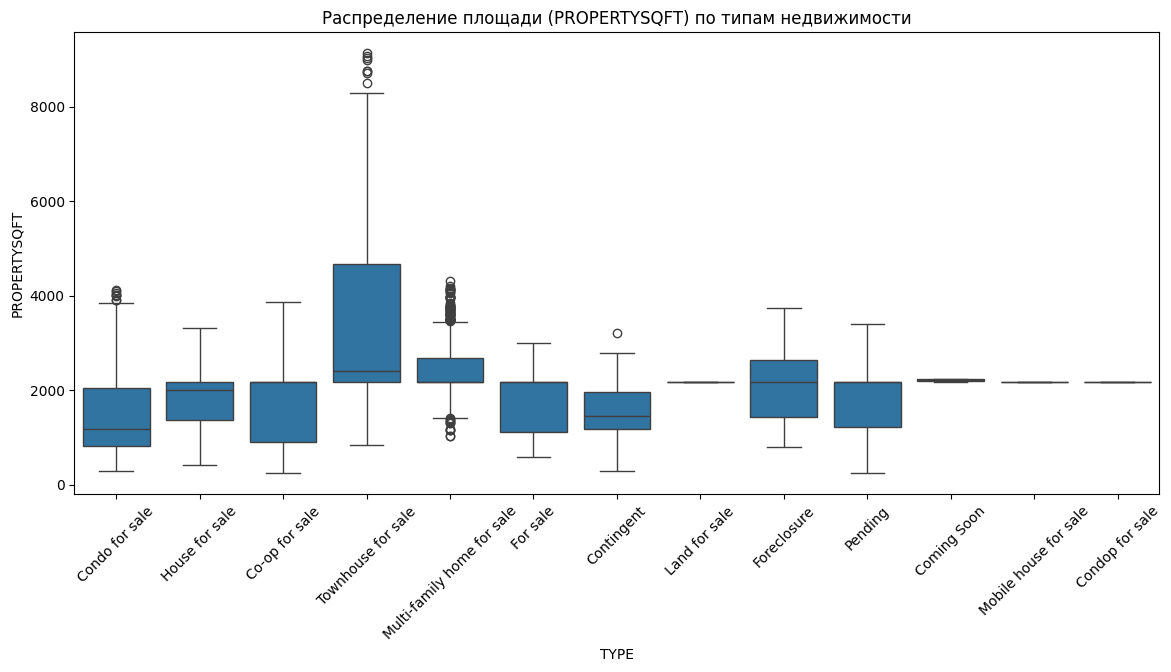

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,1.910039e+06,3.356042,2.373105,2182.579572,40.714268,-73.941542
std,4.929167e+06,2.602054,1.946461,2374.709381,0.087639,0.101011
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639512,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726756,-73.949182
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771924,-73.870638
max,1.950000e+08,50.000000,50.000000,65535.000000,40.912729,-73.702450


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.420000e+03,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,1.339439e+06,3.103620,2.152966,1872.275043,40.714031,-73.938765
std,2.257241e+06,1.910805,1.306428,960.039469,0.087977,0.101892
min,6.900000e+04,1.000000,0.000000,246.000000,40.499798,-74.253033
25%,4.750000e+05,2.000000,1.000000,1150.000000,40.638470,-73.985785
50%,7.780000e+05,3.000000,2.000000,2184.207862,40.726552,-73.946266
75%,1.295000e+06,4.000000,2.373861,2184.207862,40.771735,-73.864785
max,2.995000e+07,18.000000,13.000000,9132.000000,40.912729,-73.702450


In [19]:
# Получение чистого датасета как в разрезе цена/тип так и в разрезе площадь/тип
cleaned_ny_price, _ = outliers_finder(
    data=ny_housing,
    column_name='PRICE',
    group_col='TYPE',
    threshold=1.5,
    log_scale=True
)

cleaned_ny, _ = outliers_finder(
    data=cleaned_ny_price,
    column_name='PROPERTYSQFT',
    group_col='TYPE',
    threshold=1.5,
    log_scale=False
)

# Оценим как это все повлияло на боксплоты

# График для PRICE
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PRICE', data=cleaned_ny)
plt.title('Распределение цены (PRICE) по типам недвижимости')
plt.ylabel('PRICE natural scale')
plt.xticks(rotation=45)
plt.show()

# График для PRICE logscale
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PRICE', data=cleaned_ny)
plt.yscale('log') # логарифмическая шкала, исходя из характера распределения фита
plt.title('Распределение цены (PRICE) по типам недвижимости логарифмированное')
plt.ylabel('PRICE (log scale)')
plt.xticks(rotation=45)
plt.show()

# График для PRICE logscale
plt.figure(figsize=(14, 6))
sns.histplot(cleaned_ny, x="PRICE", log_scale=True, kde=True)
# plt.yscale('log') # логарифмическая шкала, исходя из характера распределения фита
plt.title('Распределение цены (PRICE) по типам недвижимости логарифмированное')
plt.ylabel('PRICE (log scale)')
plt.xticks(rotation=45)
plt.show()

# График для PROPERTYSQFT
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PROPERTYSQFT', data=cleaned_ny)
# plt.yscale('log')
plt.title('Распределение площади (PROPERTYSQFT) по типам недвижимости')
plt.ylabel('PROPERTYSQFT')
plt.xticks(rotation=45)
plt.show()

# И сравним как изменились статистики

display(ny_housing.describe())
display(cleaned_ny.describe())


> Можно отметить порядковое снижение по максимальному и минимальному значениям как цены так и метража, так же изменение средних и стандартного отклонения, так же визуальная оценка показывает еще большее приближение логарифмированной цены к нормальному распределению.

> Боксплоты содержат остаточные аномалии после первой очистки, вероятнее всего их мы можем зачистить использовав более низкий коэффициент при iqr, но вероятнее всего это аномалии, но не выбросы как таковые

> Общее количество зачисток составило 380 записей.

Отлично, теперь можем перейти к построению простой модели.

---

## Задание 3. Создание простой модели, визуализация результатов работы алгоритма (3 балла)

**Задание 3.1**

В рамках других дисциплин вы проходили довольно много различных моделей и хорошо в них ориентируйтесь. Давайте сейчас попробуем посмотреть, в чем нам может помочь визуализация при интерпретации моделей.

Используя любую удобную для вас библиотеку, создайте модель простейшей парной регрессии. В качестве зависимой переменной используйте `PRICE`, в качестве независимой — `PROPERTYSQFT`. Полученные коэффициенты выведите и кратко опишите (логичным ли получился результат?).

In [20]:
from sklearn.linear_model import LinearRegression

# Выделим сабсет из очищенного датасета
df = cleaned_ny[["PRICE", "PROPERTYSQFT",]]
display(df.head())

# Без трейн теста сразу в X, y
X = df["PROPERTYSQFT"].values.reshape(-1, 1)
y = df["PRICE"].values

model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов
print("Коэффициент при PROPERTYSQFT -наклон:", model.coef_[0])
print("Свободный член - intercept:", model.intercept_)
print("R^2 модели:", model.score(X, y))

,PRICE,PROPERTYSQFT
0,315000,1400.000000
2,260000,2015.000000
6,899500,2184.207862
8,265000,750.000000
9,440000,978.000000


Коэффициент при PROPERTYSQFT -наклон: 1287.1854725742528
Свободный член - intercept: -1070526.6399005062
R^2 модели: 0.2997122181673868


> Положительное значение означает, что с увеличением площади жилья на 1 квадратный фут цена в среднем возрастает примерно на 1287 долларов. Это логично: большая площадь обычно соответствует более высокой стоимости.

> Свободный член (intercept) = -1 070 526 говорит о том, что для подгонки кривой мы имеем достаточно большое значение что приводит к выводам о том что для апроксимация нам вероятнее всего не хватает 1 фита, хотя объяснение интерсепта может быть спекулятивно

> Коэффициент детерминации = 0.3 говорит о том что мы описываем 30 процентов дисперсии выборки, что мало, но допустимо для парной регрессии, мы лишь можем подтвердить предыдущий тезис и сказать что есть умеренная статистическая взаимосвязь между площадью и ценой (по хорощему можно было бы провести статесты)

**Задание 3.2**

Зачастую, когда мы работаем с парной регрессией, нам интересно отобразить полученные результаты на графике и визуально оценить, что получилось.

Создайте `scatter plot`, где по оси `x` будет находиться `PROPERTYSQFT`, а по оси `y` — `PRICE`. Добавьте на этот график прямую регрессионного уравнения, которая у нас получилась.

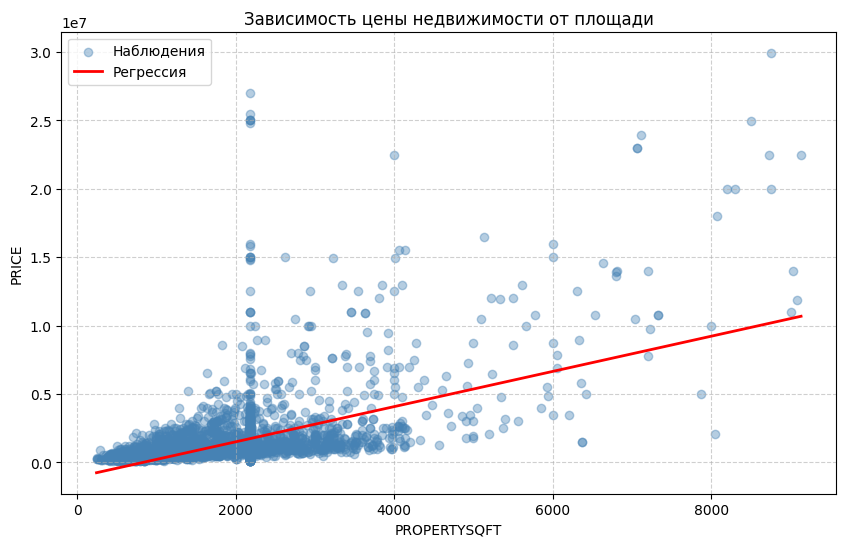

In [21]:
plt.figure(figsize=(10, 6))

# Исходные точки
plt.scatter(X, y, alpha=0.4, label='Наблюдения', color='steelblue')

# Линия регрессии (проходит по всей области значений X)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Регрессия')

# Оформление
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.title('Зависимость цены недвижимости от площади')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Ура! Анализ завершен. Мы проделали полный цикл работы аналитика от получения датасета до создания простейшей модели. В следующий раз мы познакомимся с более продвинутыми способами использования визуализаций в анализе. Stay tuned :)

## Bonus. Использование карты в качестве визуализаций

Некоторые типы визуализаций работают с конкретными типами данных. Вы могли заметить, что в нашем датасете есть столбцы LATITUDE и LONGITUDE — широта и долгота соответственно. Благодаря этим столбцам мы можем пространственно локализовать наши данные, а значит, создать карту.

К сожалению, в библиотеках `matplotlib` и `seaborn` отсутствует функционал создания карт. Однако создавать карты можно с помощью других библиотек. Одна из наиболее популярных — библиотека `folium`. Именно ей мы и воспользуемся.

Давайте для начала скачаем `folium`.

In [22]:
# !pip install folium

Теперь можем начинать. В библиотеке `folium` есть отдельный тип данных `folium.map`, который позволяет создавать карту. В ходе создания нужно задать два параметра: `location` — ширина и долгота стартового расположения карты, а также `zoom_start` — стартовое приближение.

In [23]:
import folium

map = folium.Map(location=[40.7, -73.9], zoom_start=10)

Чтобы добавить точки на карту, необходимо воспользоваться следующими функциями:
- `folium.Marker` для создания объекта точки на карте.
- `folium.add_to` для добавления объекта на карту.

Давайте создадим список парных списков, в каждом из которых будет храниться ширина и долгота объекта. Выберем только 500 первых наблюдений в датасете, чтобы не перегружать систему. В качестве описания наших точек (параметр `popup`) будем использовать цену. А направляя курсор на точку, будем отображать адрес (параметр `tooltip`).

Давайте создадим эту карту:


In [24]:
points = ny_housing[['LATITUDE', 'LONGITUDE']].values.tolist()[:500]

for i, point in enumerate(points):
    popup_text = ny_housing['PRICE'].iloc[i]         
    tooltip_text = ny_housing['MAIN_ADDRESS'].iloc[i] 
    folium.Marker(point, popup=popup_text, tooltip=tooltip_text).add_to(map)

map

Отлично!

Мы видим, что карта успешно создалась. Используя полученную визуализацию, мы уже можем сделать несколько выводов:
- После кликов на разные варианты оказалось, что средняя цена в Манхэттене сильно выше, чем в Бронксе (кто бы мог подумать!)
- Данные, которые у нас есть, относятся только к городу Нью-Йорку, а не к штату. Поскольку все перечисленные точки относятся к одному из пять боро города Нью-Йорк.
- Апартаменты, продающиеся в городе, распределены равномерно: судя по всему, спросом пользуются квартиры всех районов города.

Таким образом, просто создав карту недвижимости, мы можем получить большое количество информации о нашем датасете. Это может помочь вам в дальнейшей работе. Удачи!